In [115]:
import pandas as pd

In [116]:
ccd = pd.read_csv("CCD1n.csv", encoding = 'latin')

<ipython-input-116-af31242597ea>:1: DtypeWarning: Columns (7,68,75,77,78,81,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  ccd = pd.read_csv("CCD1n.csv", encoding = 'latin')


In [117]:
ccd.columns = ccd.columns.to_series().apply(lambda x: x.strip())

In [118]:
ccd.head()

,Unnamed: 0,CaseFilingYear,CDI,CaseID,LEAIncidentNum,LEAgency,CaseStatus,Court,OffenseDT,ArrestDT,...,Disposition_2,Disposition_2_Date,Disposition_3,Disposition_3_Date,OffenseWhileOnBond,BondCaseID,BondType,BondRelDT,SourceUpdateDT,DataSetUpdateDT
0,1,2015,2,200197901010002,166405914,HPD,C,12.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
1,2,2015,2,200198301010002,166408814,HPD,I,1.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
2,3,2015,2,200198401010002,14193053,SHF,C,2.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
3,4,2015,2,200198501010002,140193045,SHF,C,3.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
4,5,2015,2,200198601010002,201462511,BPD,C,4.0,2014-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26


In [37]:
ccd.columns

Index(['Unnamed: 0', 'CaseFilingYear', 'CDI', 'CaseID', 'LEAIncidentNum',
       'LEAgency', 'CaseStatus', 'Court', 'OffenseDT', 'ArrestDT',
       'CaseFilingDT', 'BookingNumber', 'PrimaryOffenseLevelAtBooking',
       'BookingDTS', 'ReleaseDTS', 'ICEHolds', 'HoldForOffenseLiteral',
       'AgencyPlacingHold', 'HoldPlacedDT', 'HoldLiftedDT', 'InstrumentType',
       'DefendantName', 'DefendantSPN', 'BirthMonthYear', 'Gender', 'Race',
       'Ethnicity', 'defendantAddressAtCaseFiling', 'DefendantAddress',
       'DefendantZip', 'CCQ_MH_Flag', 'MH_Indicator', 'HomelessIndicator',
       'Level_Degree', 'Offense_Literal', 'Penal_Code', 'UCRGroup',
       'NIBRSCode', 'NIBRSSubCode', 'NIBRSGrouping', 'BondAmount',
       'BondTypeCD', 'BondTypeDSC', 'BondFiledDate', 'BondApprovedDT',
       'WarrantCT', 'FirstWarrantIssueDT', 'FirstWarrantReason',
       'FirstWarrantType', 'WarrantList', 'AttorneyStatus',
       'AttorneyStatusDesc', 'Initial_1517_HearingFLG',
       'Initial_1517_Hearin

# This part of the code was done to generate reoffense labels

In [42]:
cols = ['CaseID','DefendantSPN', 'CaseFilingDT']


In [44]:
reoff_ccd = ccd[['CaseID','DefendantSPN', 'CaseFilingDT']] #extracting columns only with these 3 columns

In [45]:
reoff_ccd

,CaseID,DefendantSPN,CaseFilingDT
0,200197901010002,2440978,2015-01-01
1,200198301010002,2772000,2015-01-01
2,200198401010002,2646987,2015-01-01
3,200198501010002,763718,2015-01-01
4,200198601010002,2772001,2015-01-01
...,...,...,...
703694,176820201010003,2538364,2022-04-25
703695,176820301010003,2538364,2022-04-25
703696,176821301010003,2683812,2022-04-25
703697,176822201010003,1799790,2022-04-25


In [46]:
reoff_ccd['CaseFilingDT'] = pd.to_datetime(reoff_ccd['CaseFilingDT'])

<ipython-input-46-b154fa76f833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reoff_ccd['CaseFilingDT'] = pd.to_datetime(reoff_ccd['CaseFilingDT'])


In [74]:
dict = {k: list(sorted(v)) for k, v in reoff_ccd.groupby('DefendantSPN')['CaseFilingDT']}#grouping defendant SPN and Case Filing Date
dict

{10000: [Timestamp('2018-01-28 00:00:00'), Timestamp('2018-12-10 00:00:00')],
 10008: [Timestamp('2015-05-26 00:00:00')],
 10009: [Timestamp('2022-04-02 00:00:00')],
 10046: [Timestamp('2015-01-01 00:00:00'),
  Timestamp('2015-01-01 00:00:00'),
  Timestamp('2017-01-09 00:00:00')],
 10095: [Timestamp('2019-02-03 00:00:00')],
 10180: [Timestamp('2016-10-04 00:00:00'),
  Timestamp('2016-10-19 00:00:00'),
  Timestamp('2016-10-28 00:00:00'),
  Timestamp('2017-08-25 00:00:00'),
  Timestamp('2017-08-25 00:00:00'),
  Timestamp('2017-08-25 00:00:00')],
 10267: [Timestamp('2016-06-10 00:00:00'),
  Timestamp('2016-06-21 00:00:00'),
  Timestamp('2017-02-25 00:00:00'),
  Timestamp('2019-02-06 00:00:00')],
 10286: [Timestamp('2018-12-03 00:00:00')],
 10324: [Timestamp('2015-10-03 00:00:00'),
  Timestamp('2017-05-23 00:00:00'),
  Timestamp('2021-09-05 00:00:00')],
 10339: [Timestamp('2016-04-16 00:00:00')],
 10378: [Timestamp('2018-05-01 00:00:00'), Timestamp('2018-10-16 00:00:00')],
 10399: [Timesta

In [75]:
def lstfunc(lst):#for finding out the unique dates within groups of dependantID
  newlst = []
  for x in lst:
    if x not in newlst:
      newlst.append(x)
      #newlst.sort(key = lambda date: datetime.strptime(date, '%m-%d-%Y'))
  return newlst

for k,v in dict.items():#updating dictionary with new unique date values 
  lst = lstfunc(dict[k])
  dict[k] = lst

In [76]:
dict

{10000: [Timestamp('2018-01-28 00:00:00'), Timestamp('2018-12-10 00:00:00')],
 10008: [Timestamp('2015-05-26 00:00:00')],
 10009: [Timestamp('2022-04-02 00:00:00')],
 10046: [Timestamp('2015-01-01 00:00:00'), Timestamp('2017-01-09 00:00:00')],
 10095: [Timestamp('2019-02-03 00:00:00')],
 10180: [Timestamp('2016-10-04 00:00:00'),
  Timestamp('2016-10-19 00:00:00'),
  Timestamp('2016-10-28 00:00:00'),
  Timestamp('2017-08-25 00:00:00')],
 10267: [Timestamp('2016-06-10 00:00:00'),
  Timestamp('2016-06-21 00:00:00'),
  Timestamp('2017-02-25 00:00:00'),
  Timestamp('2019-02-06 00:00:00')],
 10286: [Timestamp('2018-12-03 00:00:00')],
 10324: [Timestamp('2015-10-03 00:00:00'),
  Timestamp('2017-05-23 00:00:00'),
  Timestamp('2021-09-05 00:00:00')],
 10339: [Timestamp('2016-04-16 00:00:00')],
 10378: [Timestamp('2018-05-01 00:00:00'), Timestamp('2018-10-16 00:00:00')],
 10399: [Timestamp('2020-06-27 00:00:00')],
 10453: [Timestamp('2016-04-01 00:00:00'), Timestamp('2018-10-10 00:00:00')],
 104

In [77]:
filtered_dict = {k: v[0:2] for (k,v) in dict.items() if len(v) > 1}#extracting first 2 dates from unique dates list greater than 1, reoffense if number of dates is greater than 1
filtered_dict

{10000: [Timestamp('2018-01-28 00:00:00'), Timestamp('2018-12-10 00:00:00')],
 10046: [Timestamp('2015-01-01 00:00:00'), Timestamp('2017-01-09 00:00:00')],
 10180: [Timestamp('2016-10-04 00:00:00'), Timestamp('2016-10-19 00:00:00')],
 10267: [Timestamp('2016-06-10 00:00:00'), Timestamp('2016-06-21 00:00:00')],
 10324: [Timestamp('2015-10-03 00:00:00'), Timestamp('2017-05-23 00:00:00')],
 10378: [Timestamp('2018-05-01 00:00:00'), Timestamp('2018-10-16 00:00:00')],
 10453: [Timestamp('2016-04-01 00:00:00'), Timestamp('2018-10-10 00:00:00')],
 10519: [Timestamp('2017-02-20 00:00:00'), Timestamp('2018-09-14 00:00:00')],
 10584: [Timestamp('2015-06-21 00:00:00'), Timestamp('2018-10-10 00:00:00')],
 10717: [Timestamp('2018-07-06 00:00:00'), Timestamp('2019-03-09 00:00:00')],
 10894: [Timestamp('2015-06-05 00:00:00'), Timestamp('2016-07-19 00:00:00')],
 10896: [Timestamp('2018-07-13 00:00:00'), Timestamp('2018-07-24 00:00:00')],
 10927: [Timestamp('2018-06-16 00:00:00'), Timestamp('2018-06-17

In [88]:
days_reoff = {k: v[1] - v[0] for (k,v) in filtered_dict.items()}#subtracting the first 2 dates to get days difference
days_reoff

{10000: Timedelta('316 days 00:00:00'),
 10046: Timedelta('739 days 00:00:00'),
 10180: Timedelta('15 days 00:00:00'),
 10267: Timedelta('11 days 00:00:00'),
 10324: Timedelta('598 days 00:00:00'),
 10378: Timedelta('168 days 00:00:00'),
 10453: Timedelta('922 days 00:00:00'),
 10519: Timedelta('571 days 00:00:00'),
 10584: Timedelta('1207 days 00:00:00'),
 10717: Timedelta('246 days 00:00:00'),
 10894: Timedelta('410 days 00:00:00'),
 10896: Timedelta('11 days 00:00:00'),
 10927: Timedelta('1 days 00:00:00'),
 10961: Timedelta('78 days 00:00:00'),
 10992: Timedelta('6 days 00:00:00'),
 11060: Timedelta('50 days 00:00:00'),
 11134: Timedelta('636 days 00:00:00'),
 11204: Timedelta('1041 days 00:00:00'),
 11418: Timedelta('1036 days 00:00:00'),
 11558: Timedelta('57 days 00:00:00'),
 11577: Timedelta('645 days 00:00:00'),
 11699: Timedelta('387 days 00:00:00'),
 11785: Timedelta('386 days 00:00:00'),
 11908: Timedelta('806 days 00:00:00'),
 12027: Timedelta('863 days 00:00:00'),
 12186:

In [90]:
#writing the dictionary to dataframe, to get number of days before reoffense

count = 1
df = pd.DataFrame(columns = ['DefendantSPN','Days_Reoffense'])
for key,val in days_reoff.items():
        df.loc[count, 'DefedantSPN'] = key
        df.loc[count, 'Days_Reoffense'] = val
        count += 1
df

,DefendantSPN,Days_Reoffense,DefedantSPN
1,NaN,316 days 00:00:00,10000.0
2,NaN,739 days 00:00:00,10046.0
3,NaN,15 days 00:00:00,10180.0
4,NaN,11 days 00:00:00,10267.0
5,NaN,598 days 00:00:00,10324.0
...,...,...,...
116560,NaN,941 days 00:00:00,63902800.0
116561,NaN,85 days 00:00:00,63908700.0
116562,NaN,1071 days 00:00:00,64906350.0
116563,NaN,312 days 00:00:00,67749200.0


In [91]:
df.to_csv('Days_Reoff.csv', index = False)#exported the dataset

### Edited the exported file to split days by delimiter space and got spn and days.

In [92]:
reoff_lab = pd.read_csv("Days_Reoff_Final.csv")

In [93]:
reoff_lab#obtained days as integer after splitting text

,DefedantSPN,Days_Reoffense
0,10000,316
1,10046,739
2,10180,15
3,10267,11
4,10324,598
...,...,...
116559,63902800,941
116560,63908700,85
116561,64906350,1071
116562,67749200,312


In [94]:
#encoding days greater than 365 as 0 (no reoffense) and 1 (offense)

reoff_lab.loc[reoff_lab['Days_Reoffense'] > 365, 'Label'] = 0
reoff_lab.loc[reoff_lab['Days_Reoffense'] <= 365, 'Label'] = 1

In [96]:
lab_reoff = reoff_lab.drop('Days_Reoffense', axis = 1)

In [97]:
lab_reoff

,DefedantSPN,Label
0,10000,1.0
1,10046,0.0
2,10180,1.0
3,10267,1.0
4,10324,0.0
...,...,...
116559,63902800,0.0
116560,63908700,1.0
116561,64906350,0.0
116562,67749200,1.0


In [99]:
lab_reoff['Label'].value_counts()

1.0    63151
0.0    53413
Name: Label, dtype: int64

In [109]:
reoff_ccd

,DefendantSPN,CaseFilingDT
0,2440978,2015-01-01
1,2772000,2015-01-01
2,2646987,2015-01-01
3,763718,2015-01-01
4,2772001,2015-01-01
...,...,...
703694,2538364,2022-04-25
703695,2538364,2022-04-25
703696,2683812,2022-04-25
703697,1799790,2022-04-25


In [110]:
reoff_ccd.to_csv('Main_Faile.csv', index = False)
lab_reoff.to_csv('Lookup_label.csv', index = False)

# Exploratory Data Analysis

In [14]:
ccd['Race'].value_counts()

W    373873
B    306642
A     10855
U      8681
I       587
Name: Race, dtype: int64

In [15]:
ccd = ccd.rename(columns = {'CaseID':'caseid'})

In [16]:
ccd.tail()

,Unnamed: 0,CaseFilingYear,CDI,caseid,LEAIncidentNum,LEAgency,CaseStatus,Court,OffenseDT,ArrestDT,...,Disposition_2,Disposition_2_Date,Disposition_3,Disposition_3_Date,OffenseWhileOnBond,BondCaseID,BondType,BondRelDT,SourceUpdateDT,DataSetUpdateDT
703694,703695,2022,3,176820201010003,NaN,NaN,A,209,2022-04-24,2022-04-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
703695,703696,2022,3,176820301010003,NaN,NaN,A,209,2022-04-24,2022-04-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
703696,703697,2022,3,176821301010003,NaN,NaN,A,228,2022-04-02,2022-04-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
703697,703698,2022,3,176822201010003,NaN,NaN,A,180,2022-04-25,2022-04-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
703698,703699,2022,3,176822301010003,NaN,NaN,A,180,2022-04-25,2022-04-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26


In [5]:
ccd.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
ccd.shape

(703699, 93)

In [7]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703699 entries, 0 to 703698
Data columns (total 93 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CaseFilingYear                    703699 non-null  int64  
 1   CDI                               703699 non-null  int64  
 2   CaseID                            703699 non-null  int64  
 3   LEAIncidentNum                    690629 non-null  object 
 4   LEAgency                          690634 non-null  object 
 5   CaseStatus                        703698 non-null  object 
 6   Court                             703259 non-null  object 
 7   OffenseDT                         691670 non-null  object 
 8   ArrestDT                          549950 non-null  object 
 9   CaseFilingDT                      703699 non-null  object 
 10  BookingNumber                     594967 non-null  float64
 11  PrimaryOffenseLevelAtBooking      703699 non-null  o

In [8]:
ucr_group = ccd['UCRGroup'].value_counts().rename_axis('UCR Group').reset_index(name = 'counts')

In [9]:
ucr_group

,UCR Group,counts
0,All Other Offenses,132838
1,Assault,109767
2,Drug Abuse Violations,105163
3,Driving Under the Influence,97853
4,Larceny-Theft,55326
5,Fraud,39378
6,Disorderly Conduct,36478
7,"Weapons: Carrying, Possessing, etc.",28212
8,Other Assaults,15641
9,Robbery,14436


In [10]:
ucr_group.to_csv('ucr_group_lookup', index=False)

In [11]:
hrarchy = pd.read_csv("HC_HRARCHY.csv")

In [12]:
ucr_group = ccd['UCRGroup'].value_counts().rename_axis('UCR Group').reset_index(name = 'counts')

In [13]:
hrarchy_group = hrarchy['CLASSIFICATION'].value_counts().rename_axis('CLASSIFICATION').reset_index(name = 'counts')

In [14]:
ccd['NIBRSCode'].value_counts()

35A     109540
90D      97140
13B      74209
23H      66486
90Z      59080
13A      46531
90ZZ     45715
520      37599
220      27656
90J      19262
13C      16464
290      14943
120      14434
26A      13899
40A       9710
11        9166
240       8853
26B       6507
250       5109
09A       2359
720       1981
90F       1836
370       1518
90C       1479
11A       1443
64A       1340
100       1325
35        1193
09B        999
90G        930
200        836
40B        701
26         629
39C        606
39         449
26C        260
40         222
23D        212
510        171
13         134
23E        121
90E        111
23C         90
39A         90
09C         74
26D         51
90H         51
39B         43
26G         35
26F         24
36A         17
210          1
Name: NIBRSCode, dtype: int64

In [15]:
hrarchy_group.to_csv('HRARCHY_GROUP_SORT', index=False)

In [16]:
date_cols = [col for col in ccd.columns if 'DT' in col]
print(date_cols)

['OffenseDT', 'ArrestDT', 'CaseFilingDT', 'BookingDTS', 'ReleaseDTS', 'HoldPlacedDT', 'HoldLiftedDT', 'BondApprovedDT', 'FirstWarrantIssueDT', 'Initial_1517_Hearing_ActionDT', 'Initial_PCD_CalendarSetDT', 'FirstSettingDT', 'InitialDispositionDT', 'FinalDispositionDT', 'CaseCompletionDT', 'ProbationDT', 'BondRelDT', 'SourceUpdateDT', 'DataSetUpdateDT']


In [17]:
ccd.describe()

,CaseFilingYear,CDI,CaseID,BookingNumber,DefendantSPN,DefendantZip,CCQ_MH_Flag,MH_Indicator,BondAmount,WarrantCT,Hearing1517Count,DispositionCNT,InitialDispositionCourt,FinalDispositionCourt,FineAmount,PSA_PriorViolentConviction,FTAScaleScore,NCAScaleScore,Disposition_3_Date,BondCaseID
count,703699.000000,703699.000000,7.036990e+05,5.949670e+05,7.036990e+05,630652.000000,0.0,0.0,6.779060e+05,511822.000000,141139.000000,568586.000000,568586.000000,568586.000000,13020.000000,236057.000000,236057.000000,236057.000000,2528.000000,7.512900e+04
mean,2018.115615,2.437579,1.944543e+14,4.199455e+06,2.426449e+06,76657.439945,NaN,NaN,2.887513e+04,1.406012,1.053472,1.056385,101.716659,101.716659,540.445238,1.493478,2.267868,3.109444,18114.352848,1.918852e+14
std,2.139114,0.496089,3.129846e+13,2.295514e+05,8.124138e+05,5704.035120,NaN,NaN,4.094747e+05,0.780554,0.259134,0.250470,116.801756,116.801756,811.391825,0.873337,1.143358,1.448178,615.577964,3.245471e+13
min,2015.000000,2.000000,1.453149e+14,9.923070e+05,1.000000e+04,0.000000,NaN,NaN,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,16598.000000,1.133642e+14
25%,2016.000000,2.000000,1.633160e+14,4.000414e+06,2.077078e+06,77035.000000,NaN,NaN,5.000000e+02,1.000000,1.000000,1.000000,7.000000,7.000000,250.000000,1.000000,1.000000,2.000000,17643.250000,1.632637e+14
50%,2018.000000,2.000000,2.047153e+14,4.193232e+06,2.655370e+06,77076.000000,NaN,NaN,2.000000e+03,1.000000,1.000000,1.000000,14.000000,14.000000,400.000000,1.000000,2.000000,3.000000,18102.000000,1.736568e+14
75%,2020.000000,3.000000,2.227166e+14,4.404230e+06,2.914310e+06,77379.000000,NaN,NaN,1.000000e+04,2.000000,1.000000,1.000000,184.000000,184.000000,500.000000,2.000000,3.000000,4.000000,18688.000000,2.261364e+14
max,2022.000000,3.000000,2.404773e+14,4.596263e+06,7.185960e+07,99999.000000,NaN,NaN,8.888889e+07,13.000000,7.000000,4.000000,482.000000,482.000000,30000.000000,4.000000,6.000000,6.000000,19107.000000,2.403866e+14


In [18]:
ccd['DefendantSPN'].value_counts().idxmax()

2999803

In [19]:
most_crime_defendant = ccd.loc[ccd['DefendantSPN'] == 2999803]

In [20]:
most_crime_defendant['DefendantName']

398958    GAMBLING PROCEEDS,
399566    GAMBLING PROCEEDS,
400881    GAMBLING PROCEEDS,
405121    GAMBLING PROCEEDS,
405190    GAMBLING PROCEEDS,
                 ...        
614689    GAMBLING PROCEEDS,
614711    GAMBLING PROCEEDS,
615732    GAMBLING PROCEEDS,
621232    GAMBLING PROCEEDS,
621253    GAMBLING PROCEEDS,
Name: DefendantName, Length: 204, dtype: object

In [21]:
most_crime_defendant.shape

(204, 93)

In [22]:
GAMBLING_PROCEEDS_perc = most_crime_defendant.shape[0]/ccd.shape[0]
GAMBLING_PROCEEDS_perc * 100

0.0289896674572509

<AxesSubplot:xlabel='CaseFilingYear'>

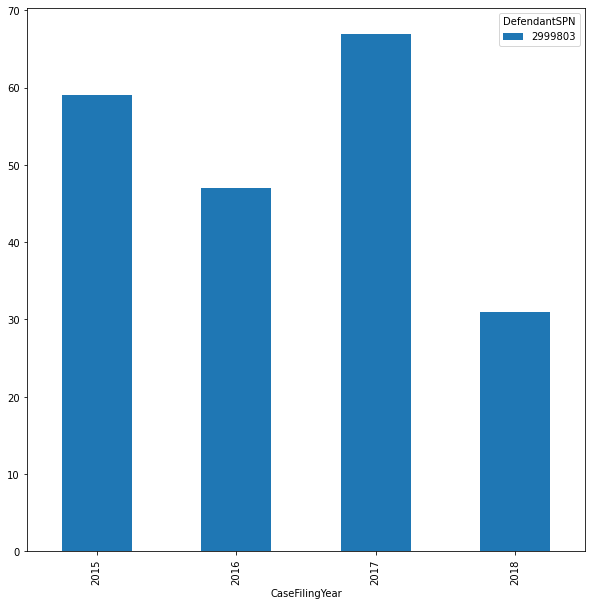

In [23]:
fig2 = most_crime_defendant['CaseFilingYear'].groupby([most_crime_defendant.CaseFilingYear, most_crime_defendant.DefendantSPN]).agg('count').unstack(1).plot.bar(figsize = (10,10))
fig2

In [24]:
ccd.columns

Index(['CaseFilingYear', 'CDI', 'CaseID', 'LEAIncidentNum', 'LEAgency',
       'CaseStatus', 'Court', 'OffenseDT', 'ArrestDT', 'CaseFilingDT',
       'BookingNumber', 'PrimaryOffenseLevelAtBooking', 'BookingDTS',
       'ReleaseDTS', 'ICEHolds', 'HoldForOffenseLiteral', 'AgencyPlacingHold',
       'HoldPlacedDT', 'HoldLiftedDT', 'InstrumentType', 'DefendantName',
       'DefendantSPN', 'BirthMonthYear', 'Gender', 'Race', 'Ethnicity',
       'defendantAddressAtCaseFiling', 'DefendantAddress', 'DefendantZip',
       'CCQ_MH_Flag', 'MH_Indicator', 'HomelessIndicator', 'Level_Degree',
       'Offense_Literal', 'Penal_Code', 'UCRGroup', 'NIBRSCode',
       'NIBRSSubCode', 'NIBRSGrouping', 'BondAmount', 'BondTypeCD',
       'BondTypeDSC', 'BondFiledDate', 'BondApprovedDT', 'WarrantCT',
       'FirstWarrantIssueDT', 'FirstWarrantReason', 'FirstWarrantType',
       'WarrantList', 'AttorneyStatus', 'AttorneyStatusDesc',
       'Initial_1517_HearingFLG', 'Initial_1517_Hearing_ActionDT',
       '

In [23]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703699 entries, 0 to 703698
Data columns (total 94 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        703699 non-null  int64  
 1   CaseFilingYear                    703699 non-null  int64  
 2   CDI                               703699 non-null  int64  
 3   caseid                            703699 non-null  int64  
 4   LEAIncidentNum                    690629 non-null  object 
 5   LEAgency                          690634 non-null  object 
 6   CaseStatus                        703698 non-null  object 
 7   Court                             703259 non-null  object 
 8   OffenseDT                         691670 non-null  object 
 9   ArrestDT                          549950 non-null  object 
 10  CaseFilingDT                      703699 non-null  object 
 11  BookingNumber                     594967 non-null  f

In [25]:
offense_ds = ccd.loc[(ccd['PrimaryOffenseLevelAtBooking'] == 'Misdemeanor') | (ccd['PrimaryOffenseLevelAtBooking'] == 'Felony')]

[]

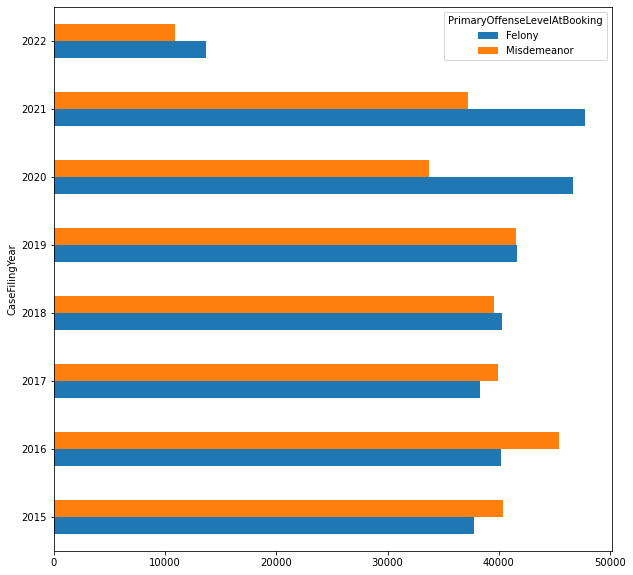

In [26]:
fig = offense_ds['CaseFilingYear'].groupby([offense_ds.CaseFilingYear, offense_ds.PrimaryOffenseLevelAtBooking]).agg('count').unstack(1).plot.barh(figsize = (10,10))
fig.plot(figsize = (400,30))

In [119]:
ccd['BirthYear'] = ccd['BirthMonthYear'].str.strip().str[0:4]


In [121]:
ccd['CaseFilingYear'].astype(str).astype(float)

0         2015.0
1         2015.0
2         2015.0
3         2015.0
4         2015.0
           ...  
703694    2022.0
703695    2022.0
703696    2022.0
703697    2022.0
703698    2022.0
Name: CaseFilingYear, Length: 703699, dtype: float64

In [122]:
ccd['BirthYear'] = pd.to_numeric(ccd['BirthYear'])

In [123]:
ccd['Age'] = ccd['CaseFilingYear'] - ccd['BirthYear']

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

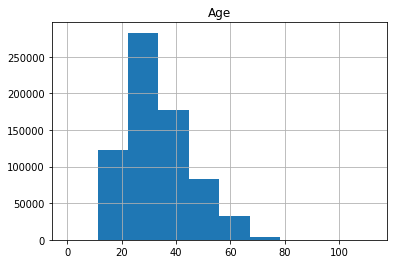

In [124]:
ccd.hist(column = 'Age')

In [127]:
ccd.columns

Index(['Unnamed: 0', 'CaseFilingYear', 'CDI', 'CaseID', 'LEAIncidentNum',
       'LEAgency', 'CaseStatus', 'Court', 'OffenseDT', 'ArrestDT',
       'CaseFilingDT', 'BookingNumber', 'PrimaryOffenseLevelAtBooking',
       'BookingDTS', 'ReleaseDTS', 'ICEHolds', 'HoldForOffenseLiteral',
       'AgencyPlacingHold', 'HoldPlacedDT', 'HoldLiftedDT', 'InstrumentType',
       'DefendantName', 'DefendantSPN', 'BirthMonthYear', 'Gender', 'Race',
       'Ethnicity', 'defendantAddressAtCaseFiling', 'DefendantAddress',
       'DefendantZip', 'CCQ_MH_Flag', 'MH_Indicator', 'HomelessIndicator',
       'Level_Degree', 'Offense_Literal', 'Penal_Code', 'UCRGroup',
       'NIBRSCode', 'NIBRSSubCode', 'NIBRSGrouping', 'BondAmount',
       'BondTypeCD', 'BondTypeDSC', 'BondFiledDate', 'BondApprovedDT',
       'WarrantCT', 'FirstWarrantIssueDT', 'FirstWarrantReason',
       'FirstWarrantType', 'WarrantList', 'AttorneyStatus',
       'AttorneyStatusDesc', 'Initial_1517_HearingFLG',
       'Initial_1517_Hearin

In [128]:
controls = ['Race', 'Gender', 'Ethnicity', 'Age', 'DefendantSPN']

In [114]:
re_lab = pd.read_csv("Reoffense_Label.csv")
re_lab

,DefendantSPN,CaseFilingDT,Reoffense_Label
0,2440978,1/1/2015,0
1,2772000,1/1/2015,0
2,2646987,1/1/2015,0
3,763718,1/1/2015,0
4,2772001,1/1/2015,1
...,...,...,...
703694,2538364,4/25/2022,0
703695,2538364,4/25/2022,0
703696,2683812,4/25/2022,0
703697,1799790,4/25/2022,1


In [129]:
control_df = ccd[controls]

In [130]:
control_df

,Race,Gender,Ethnicity,Age,DefendantSPN
0,W,M,U,59.0,2440978
1,W,M,U,33.0,2772000
2,W,M,N,24.0,2646987
3,W,F,N,48.0,763718
4,B,M,N,58.0,2772001
...,...,...,...,...,...
703694,B,M,U,40.0,2538364
703695,B,M,U,40.0,2538364
703696,W,F,H,26.0,2683812
703697,B,M,N,45.0,1799790


In [131]:
rd_data = pd.merge(re_lab, control_df)

In [132]:
rd_data

,DefendantSPN,CaseFilingDT,Reoffense_Label,Race,Gender,Ethnicity,Age
0,2440978,1/1/2015,0,W,M,U,59.0
1,2772000,1/1/2015,0,W,M,U,33.0
2,2646987,1/1/2015,0,W,M,N,24.0
3,763718,1/1/2015,0,W,F,N,48.0
4,2772001,1/1/2015,1,B,M,N,58.0
...,...,...,...,...,...,...,...
2730122,2538364,4/25/2022,0,B,M,U,40.0
2730123,2538364,4/25/2022,0,B,M,U,40.0
2730124,2538364,4/25/2022,0,B,M,U,40.0
2730125,2538364,4/25/2022,0,B,M,U,40.0


In [133]:
rd_data.to_csv("Data for Regression Discontinuity")

In [32]:
ccd['Age'].describe()

count    702386.000000
mean         33.369372
std          11.410724
min           0.000000
25%          24.000000
50%          31.000000
75%          40.000000
max         112.000000
Name: Age, dtype: float64

In [33]:
sp_race_ds = ccd.loc[(ccd['Race'] == 'W') | (ccd['Race'] == 'B')]

<AxesSubplot:xlabel='CaseFilingYear'>

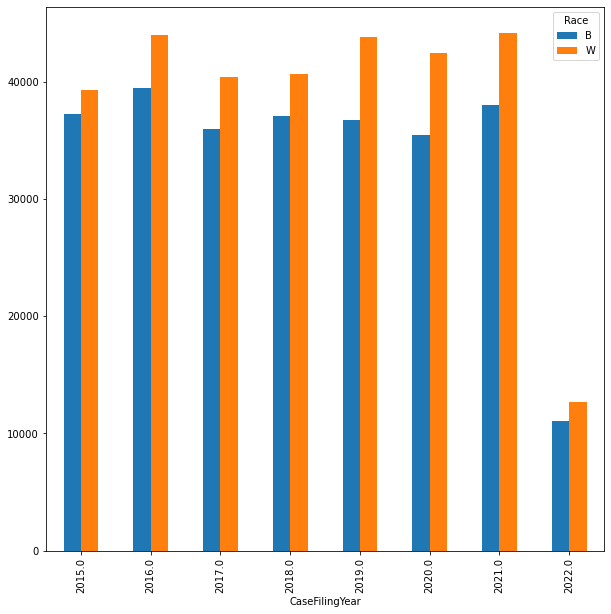

In [34]:
fig1 = sp_race_ds['CaseFilingYear'].groupby([offense_ds.CaseFilingYear, offense_ds.Race]).agg('count').unstack(1).plot.bar(figsize = (10,10))
fig1

Text(0.5, 1.0, 'UCR Group Count for Offenders older than 40')

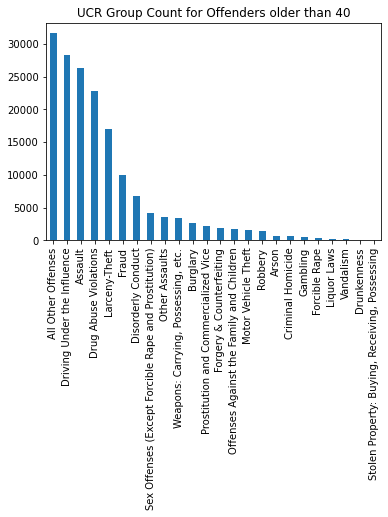

In [35]:
age_gtr_40 = ccd.loc[ccd['Age'] > 40]
ucr_count = age_gtr_40['UCRGroup'].value_counts()
ax1 = ucr_count.plot(kind = 'bar')
ax1.set_title("UCR Group Count for Offenders older than 40")

In [36]:
obj_cols = list(ccd.select_dtypes(include = 'object'))

In [37]:
obj_cols

['LEAIncidentNum',
 'LEAgency',
 'CaseStatus',
 'Court',
 'OffenseDT',
 'ArrestDT',
 'CaseFilingDT',
 'PrimaryOffenseLevelAtBooking',
 'BookingDTS',
 'ReleaseDTS',
 'ICEHolds',
 'HoldForOffenseLiteral',
 'AgencyPlacingHold',
 'HoldPlacedDT',
 'HoldLiftedDT',
 'InstrumentType',
 'DefendantName',
 'BirthMonthYear',
 'Gender',
 'Race',
 'Ethnicity',
 'defendantAddressAtCaseFiling',
 'DefendantAddress',
 'HomelessIndicator',
 'Level_Degree',
 'Offense_Literal',
 'Penal_Code',
 'UCRGroup',
 'NIBRSCode',
 'NIBRSSubCode',
 'NIBRSGrouping',
 'BondTypeCD',
 'BondTypeDSC',
 'BondFiledDate',
 'BondApprovedDT',
 'FirstWarrantIssueDT',
 'FirstWarrantReason',
 'FirstWarrantType',
 'WarrantList',
 'AttorneyStatus',
 'AttorneyStatusDesc',
 'Initial_1517_HearingFLG',
 'Initial_1517_Hearing_ActionDT',
 'PCD_SettingFLG',
 'Initial_PCD_CalendarSetDT',
 'Initial_PCD_DispositionReason',
 'Initial_PCD_DispositionReasonDSC',
 'FirstSettingDT',
 'InitialDispositionDT',
 'InitialDisposition',
 'FinalDisposition

In [38]:
ccd_obj = ccd[obj_cols]

<AxesSubplot:>

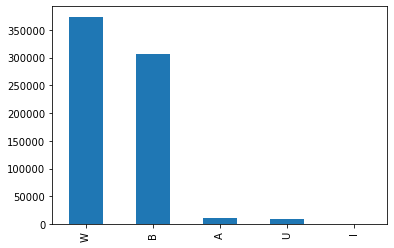

In [39]:
race_count = ccd_obj['Race'].value_counts()
race_count.plot(kind = 'bar')

<AxesSubplot:>

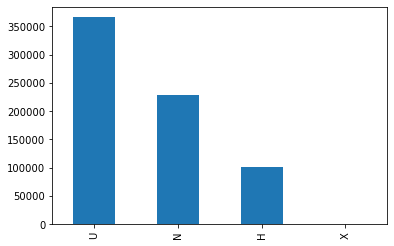

In [40]:
ethnicity_count = ccd_obj['Ethnicity'].value_counts()
ethnicity_count.plot(kind = 'bar')

Text(0.5, 1.0, 'UCR Groups')

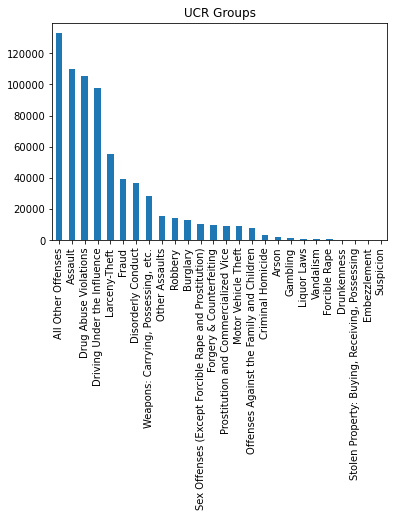

In [76]:
ucr_count = ccd_obj['UCRGroup'].value_counts()
ax = ucr_count.plot(kind = 'bar')
ax.set_title("UCR Groups")

Text(0.5, 1.0, 'NIBRS Group Count')

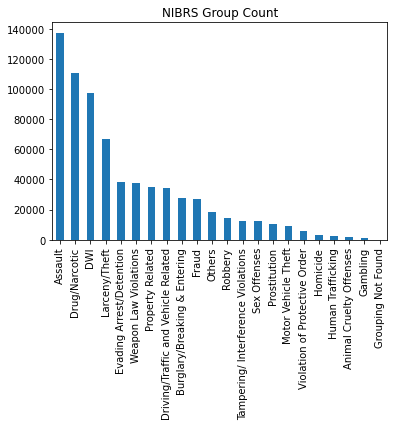

In [42]:
ucr_count = ccd_obj['NIBRSGrouping'].value_counts()
ax = ucr_count.plot(kind = 'bar')
ax.set_title("NIBRS Group Count")

# Creating a dataset of only int64 and float64 variables

In [43]:
num_cols = list(ccd.select_dtypes(include = ['int64','float64']))
print(num_cols)

['CaseFilingYear', 'CDI', 'CaseID', 'BookingNumber', 'DefendantSPN', 'DefendantZip', 'CCQ_MH_Flag', 'MH_Indicator', 'BondAmount', 'WarrantCT', 'Hearing1517Count', 'DispositionCNT', 'InitialDispositionCourt', 'FinalDispositionCourt', 'FineAmount', 'PSA_PriorViolentConviction', 'FTAScaleScore', 'NCAScaleScore', 'Disposition_3_Date', 'BondCaseID', 'BirthYear', 'Age']


In [44]:
ccd_num = ccd[num_cols]
ccd_num.head()

,CaseFilingYear,CDI,CaseID,BookingNumber,DefendantSPN,DefendantZip,CCQ_MH_Flag,MH_Indicator,BondAmount,WarrantCT,...,InitialDispositionCourt,FinalDispositionCourt,FineAmount,PSA_PriorViolentConviction,FTAScaleScore,NCAScaleScore,Disposition_3_Date,BondCaseID,BirthYear,Age
0,2015,2,200197901010002,3800316.0,2440978,77015.0,NaN,NaN,5000.0,1.0,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,59.0
1,2015,2,200198301010002,NaN,2772000,77036.0,NaN,NaN,0.0,2.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,33.0
2,2015,2,200198401010002,3800174.0,2646987,77493.0,NaN,NaN,1500.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1991.0,24.0
3,2015,2,200198501010002,3800157.0,763718,77554.0,NaN,NaN,1500.0,1.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,48.0
4,2015,2,200198601010002,3800189.0,2772001,NaN,NaN,NaN,3000.0,1.0,...,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1957.0,58.0


array([[<AxesSubplot:title={'center':'FineAmount'}>]], dtype=object)

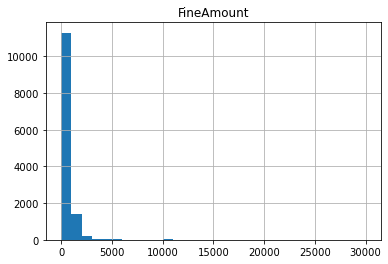

In [45]:
ccd_num.hist(column = "FineAmount", bins = 30)

In [46]:
ccd_num['FineAmount'].describe()

count    13020.000000
mean       540.445238
std        811.391825
min          0.000000
25%        250.000000
50%        400.000000
75%        500.000000
max      30000.000000
Name: FineAmount, dtype: float64

# This part was used for calculating jail days

In [47]:
ccd_jail_time = ccd[['CaseID', 'CaseFilingDT', 'ReleaseDTS', 'InitialDispositionDT','CaseFilingYear']]

In [48]:
ccd_jail_time

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear
0,200197901010002,2015-01-01,2015-10-08,2015-01-05,2015
1,200198301010002,2015-01-01,NaN,2015-04-21,2015
2,200198401010002,2015-01-01,2015-01-03,2015-05-08,2015
3,200198501010002,2015-01-01,2015-01-01,2015-03-10,2015
4,200198601010002,2015-01-01,2015-01-16,2015-01-15,2015
...,...,...,...,...,...
703694,176820201010003,2022-04-25,NaN,NaN,2022
703695,176820301010003,2022-04-25,NaN,NaN,2022
703696,176821301010003,2022-04-25,NaN,NaN,2022
703697,176822201010003,2022-04-25,NaN,NaN,2022


In [49]:
ccd.shape

(703699, 95)

In [50]:
ccd_jail_time.dropna(axis = 0, inplace = True)

<ipython-input-50-4652c6c26d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccd_jail_time.dropna(axis = 0, inplace = True)


In [51]:
ccd_jail_time.shape

(484881, 5)

In [52]:
ccd_jail_time

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear
0,200197901010002,2015-01-01,2015-10-08,2015-01-05,2015
2,200198401010002,2015-01-01,2015-01-03,2015-05-08,2015
3,200198501010002,2015-01-01,2015-01-01,2015-03-10,2015
4,200198601010002,2015-01-01,2015-01-16,2015-01-15,2015
5,200199201010002,2015-01-01,2015-01-02,2015-01-08,2015
...,...,...,...,...,...
703472,176728701010003,2022-04-19,2022-04-20,2022-04-20,2022
703473,176728801010003,2022-04-19,2022-04-20,2022-04-20,2022
703623,176787301010003,2022-04-22,2022-04-26,2022-04-25,2022
703649,176796101010003,2022-04-23,2022-04-24,2022-04-25,2022


In [53]:
ccd_jail_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484881 entries, 0 to 703657
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CaseID                484881 non-null  int64 
 1   CaseFilingDT          484881 non-null  object
 2   ReleaseDTS            484881 non-null  object
 3   InitialDispositionDT  484881 non-null  object
 4   CaseFilingYear        484881 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 22.2+ MB


In [54]:
ccd_jail_time['CaseFilingDT'] = pd.to_datetime(ccd_jail_time['CaseFilingDT'])
ccd_jail_time['ReleaseDTS'] = pd.to_datetime(ccd_jail_time['ReleaseDTS'])
ccd_jail_time['InitialDispositionDT'] = pd.to_datetime(ccd_jail_time['InitialDispositionDT'])

<ipython-input-54-e866d72e822d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccd_jail_time['CaseFilingDT'] = pd.to_datetime(ccd_jail_time['CaseFilingDT'])
<ipython-input-54-e866d72e822d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccd_jail_time['ReleaseDTS'] = pd.to_datetime(ccd_jail_time['ReleaseDTS'])
<ipython-input-54-e866d72e822d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [55]:
ccd_jail_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484881 entries, 0 to 703657
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CaseID                484881 non-null  int64         
 1   CaseFilingDT          484881 non-null  datetime64[ns]
 2   ReleaseDTS            484881 non-null  datetime64[ns]
 3   InitialDispositionDT  484881 non-null  datetime64[ns]
 4   CaseFilingYear        484881 non-null  int64         
dtypes: datetime64[ns](3), int64(2)
memory usage: 22.2 MB


In [56]:
ccd_jail_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484881 entries, 0 to 703657
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CaseID                484881 non-null  int64         
 1   CaseFilingDT          484881 non-null  datetime64[ns]
 2   ReleaseDTS            484881 non-null  datetime64[ns]
 3   InitialDispositionDT  484881 non-null  datetime64[ns]
 4   CaseFilingYear        484881 non-null  int64         
dtypes: datetime64[ns](3), int64(2)
memory usage: 22.2 MB


In [57]:
ccd_jail_time

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear
0,200197901010002,2015-01-01,2015-10-08,2015-01-05,2015
2,200198401010002,2015-01-01,2015-01-03,2015-05-08,2015
3,200198501010002,2015-01-01,2015-01-01,2015-03-10,2015
4,200198601010002,2015-01-01,2015-01-16,2015-01-15,2015
5,200199201010002,2015-01-01,2015-01-02,2015-01-08,2015
...,...,...,...,...,...
703472,176728701010003,2022-04-19,2022-04-20,2022-04-20,2022
703473,176728801010003,2022-04-19,2022-04-20,2022-04-20,2022
703623,176787301010003,2022-04-22,2022-04-26,2022-04-25,2022
703649,176796101010003,2022-04-23,2022-04-24,2022-04-25,2022


In [58]:
case_filDT = ccd_jail_time['CaseFilingDT']
relDT = ccd_jail_time['ReleaseDTS']
indispDT = ccd_jail_time['InitialDispositionDT']

In [59]:
ccd_jail_time.shape

(484881, 5)

In [60]:
oth_case = ccd_jail_time.loc[ccd_jail_time['ReleaseDTS'] > ccd_jail_time['InitialDispositionDT']]

In [61]:
oth_case['Jail_Days'] = oth_case['InitialDispositionDT'] - oth_case['CaseFilingDT']

<ipython-input-61-105524f67662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oth_case['Jail_Days'] = oth_case['InitialDispositionDT'] - oth_case['CaseFilingDT']


In [62]:
oth_case

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear,Jail_Days
0,200197901010002,2015-01-01,2015-10-08,2015-01-05,2015,4 days
4,200198601010002,2015-01-01,2015-01-16,2015-01-15,2015,14 days
7,200199701010002,2015-01-01,2015-02-13,2015-01-12,2015,11 days
10,200200501010002,2015-01-01,2015-01-24,2015-01-05,2015,4 days
18,200204201010002,2015-01-01,2015-07-05,2015-06-22,2015,172 days
...,...,...,...,...,...,...
703034,176545701010003,2022-04-05,2022-04-09,2022-04-08,2022,3 days
703204,176612501010003,2022-04-09,2022-04-19,2022-04-18,2022,9 days
703325,176669801010003,2022-04-14,2022-04-19,2022-04-18,2022,4 days
703326,176670001010003,2022-04-14,2022-04-19,2022-04-18,2022,4 days


In [63]:
oth1_case =  ccd_jail_time.loc[ccd_jail_time['ReleaseDTS'] < ccd_jail_time['InitialDispositionDT']]

In [64]:
oth1_case['Jail_Days'] = oth1_case['ReleaseDTS'] - oth1_case['CaseFilingDT']

<ipython-input-64-8ae5c5d3f024>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oth1_case['Jail_Days'] = oth1_case['ReleaseDTS'] - oth1_case['CaseFilingDT']


In [65]:
oth1_case

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear,Jail_Days
2,200198401010002,2015-01-01,2015-01-03,2015-05-08,2015,2 days
3,200198501010002,2015-01-01,2015-01-01,2015-03-10,2015,0 days
5,200199201010002,2015-01-01,2015-01-02,2015-01-08,2015,1 days
8,200200301010002,2015-01-01,2015-01-06,2015-02-10,2015,5 days
9,200200401010002,2015-01-01,2015-01-06,2015-02-10,2015,5 days
...,...,...,...,...,...,...
703388,176694801010003,2022-04-16,2022-04-17,2022-04-19,2022,1 days
703402,176701101010003,2022-04-16,2022-04-17,2022-04-21,2022,1 days
703406,176703001010003,2022-04-16,2022-04-18,2022-04-19,2022,2 days
703649,176796101010003,2022-04-23,2022-04-24,2022-04-25,2022,1 days


In [66]:
jail_days = oth_case.append(oth1_case, ignore_index=True)

In [67]:
jail_days

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear,Jail_Days
0,200197901010002,2015-01-01,2015-10-08,2015-01-05,2015,4 days
1,200198601010002,2015-01-01,2015-01-16,2015-01-15,2015,14 days
2,200199701010002,2015-01-01,2015-02-13,2015-01-12,2015,11 days
3,200200501010002,2015-01-01,2015-01-24,2015-01-05,2015,4 days
4,200204201010002,2015-01-01,2015-07-05,2015-06-22,2015,172 days
...,...,...,...,...,...,...
465823,176694801010003,2022-04-16,2022-04-17,2022-04-19,2022,1 days
465824,176701101010003,2022-04-16,2022-04-17,2022-04-21,2022,1 days
465825,176703001010003,2022-04-16,2022-04-18,2022-04-19,2022,2 days
465826,176796101010003,2022-04-23,2022-04-24,2022-04-25,2022,1 days


In [68]:
jail_days.sort_values('CaseFilingYear')

,CaseID,CaseFilingDT,ReleaseDTS,InitialDispositionDT,CaseFilingYear,Jail_Days
0,200197901010002,2015-01-01,2015-10-08,2015-01-05,2015,4 days
66273,145759801010003,2015-02-10,2015-06-02,2015-05-21,2015,100 days
66272,145759501010003,2015-02-10,2015-08-04,2015-07-09,2015,149 days
66271,145758201010003,2015-02-10,2015-03-11,2015-02-12,2015,2 days
66270,145756601010003,2015-02-10,2016-02-25,2016-02-04,2015,359 days
...,...,...,...,...,...,...
344795,239271001010002,2022-01-27,2022-01-27,2022-02-03,2022,0 days
344796,239271901010002,2022-01-27,2022-02-17,2022-04-07,2022,21 days
344797,239273501010002,2022-01-27,2022-01-27,2022-02-03,2022,0 days
344784,239240301010002,2022-01-24,2022-01-24,2022-04-13,2022,0 days


In [69]:
jail_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465828 entries, 0 to 465827
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   CaseID                465828 non-null  int64          
 1   CaseFilingDT          465828 non-null  datetime64[ns] 
 2   ReleaseDTS            465828 non-null  datetime64[ns] 
 3   InitialDispositionDT  465828 non-null  datetime64[ns] 
 4   CaseFilingYear        465828 non-null  int64          
 5   Jail_Days             465828 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), int64(2), timedelta64[ns](1)
memory usage: 21.3 MB


In [70]:
jail_days.to_csv('SQL_file_for_groupby')

In [71]:
jail_time_gby = pd.read_csv("Groupby.csv")

In [72]:
jail_time_gby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465828 entries, 0 to 465827
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            465828 non-null  int64  
 1   CaseID                465828 non-null  float64
 2   CaseFilingDT          465828 non-null  object 
 3   ReleaseDTS            465828 non-null  object 
 4   InitialDispositionDT  465828 non-null  object 
 5   CaseFilingYear        465828 non-null  int64  
 6   Jail_Days             465828 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 24.9+ MB


# This part of the code was used for string filtering

In [ ]:
pip install fuzzywuzzy

In [ ]:
!pip install requests fuzzywuzzy pandas pyjstat numpy plotly matplotlib seaborn geopy google folium pandas googlemaps

In [77]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\Sourav Ray\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [78]:
main = pd.read_csv("Main.csv")
har_off_lit = pd.read_csv("Harris_County_Offense_Literal.csv")

In [79]:
h1 = har_off_lit.copy()

In [80]:
h1.drop_duplicates(inplace = True)

In [81]:
h1.insert(0,'Key', range(1, 1+len(h1)))

In [82]:
h1

,Key,Offense_Literal (Harris county)
0,1,ABAN/ENDANG CHILD W/INT TO RET22.04
1,2,ABAN/ENDANG CHILD W/INT TO RET22.041
2,3,ABANDON/ENDANG CHILD W/O INT T22.041
3,4,ABANDONING CHILD UNDER 15 22.041
4,5,ABUSE OF OFF CAP>=2500 <30K
...,...,...
1598,1595,WATER POLL ST LIABIL VIOL INDV
1599,1596,WATER POLLUTION 26.212
1600,1597,WEAPON-POSSESSION OF 46.02
1601,1598,WEAPON FREE SCHOOL ZONE-PROH W46.11


In [83]:
main.columns = main.columns

In [84]:
m = main.shape[0]

In [85]:
h = har_off_lit.shape[0]

In [86]:
h/m

64.12

In [87]:
main.tail()

,Classification
20,Liquor laws
21,Drunkenness
22,Disorderly conduct
23,VagrancyCurfewloitering violations
24,Impaired driving


In [88]:
main['Classification'] = main['Classification'].str.upper().str.replace(" ","")

In [89]:
har_off_lit['Offense_Literal (Harris county)'] = har_off_lit['Offense_Literal (Harris county)'].str.upper().str.replace(" ","")

In [90]:
main

,Classification
0,MURDER
1,RAPE
2,OTHERSEXUALASSAULT
3,ROBBERY
4,ASSAULT
5,INTIMATEPARTNERVIOLENCE
6,CHILDMALTREATMENT
7,ARSON
8,IMPAIREDDRIVINGCRASH
9,OTHERIMPAIREDDRIVING


In [ ]:
har_off_lit.head()

In [ ]:
har_off_lit.nunique()

In [ ]:
har_off_lit.shape[0]

In [ ]:
har_off_lit.info()

In [ ]:
har_off_lit[har_off_lit.duplicated()]

In [ ]:
har_off_lit = har_off_lit.drop_duplicates()

In [ ]:
main_list = main['Classification'].tolist()
har_list = har_off_lit['Offense_Literal (Harris county)'].tolist()
main_list_condensed = []

In [ ]:
def unique(a):
    p = ""
    for char in a:
        if char not in p:
            p = p + char
    return p

In [ ]:
for i in main_list:
    main_list_condensed.append(unique(i))

main_list_condensed

In [ ]:
#changing ucr_cat to main ucr groups

#WEPN
#MURDE
#ASLT
#ROBEY
#ARSN
#ROBEY
#FRAUD
#RAPE
#THEF


b = 'THEF'
matches = {}
for i in har_list:
    score = fuzz.partial_ratio(i,b)
    matches[i] = score

In [ ]:
ucr_match = pd.DataFrame.from_dict(matches.items())
ucr_match.columns = ['Condensed_Off_Lit','Weapon Scores']
ucr_match

In [ ]:
ucr_match.insert(0,'Key', range(1, 1+len(ucr_match)))

In [ ]:
ucr_match.drop(ucr_match.columns[1], axis = 1, inplace = True)

In [ ]:
ucr_match

In [ ]:
#final_ucr_scores = pd.merge(h1,ucr_match, on = 'Key')
final_ucr_scores = pd.merge(final_ucr_scores, ucr_match, on = 'Key')

In [ ]:
final_ucr_scores

In [ ]:
final_ucr_scores.to_csv('8 UCR Groups')

In [5]:
import pandas as pd
import numpy as np

# Until this was used for string filtering

In [6]:
jdays_per_case = pd.read_csv("Days_Per_Case.csv")

In [7]:
jdays_per_case.head()

,caseid,count
0,30558101010003,8.000000
1,40493901010003,27.000000
2,44845001010003,120.958333
3,46325101010003,691.000000
4,46325201010003,691.000000


In [17]:
jdays_ccd = jdays_per_case.merge(ccd, on = 'caseid', how = 'inner')

In [18]:
jdays_ccd

,caseid,count,Unnamed: 0,CaseFilingYear,CDI,LEAIncidentNum,LEAgency,CaseStatus,Court,OffenseDT,...,Disposition_2,Disposition_2_Date,Disposition_3,Disposition_3_Date,OffenseWhileOnBond,BondCaseID,BondType,BondRelDT,SourceUpdateDT,DataSetUpdateDT
0,145314901010003,4.0,396602,2015,3,HC14193075,SHF,C,178,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
1,145315001010003,0.0,395776,2015,3,TX486K0UCC58,DPS,C,177,2014-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
2,145315101010003,169.0,395777,2015,3,HC140193123,CD4,C,185,2014-12-31,...,MRP/MAJ DISM,2016-09-01,MAJ GRANTED,17304.0,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
3,145315201010003,36.0,396603,2015,3,166436514,HPD,C,184,2014-12-31,...,MAJ GRANTED,2015-09-16,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
4,145315301010003,36.0,396604,2015,3,166436514,HPD,C,184,2014-12-31,...,MAJ GRANTED,2015-09-16,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-26,2022-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405552,238936701010002,0.0,294538,2021,2,211200263,CD8,D,16,2021-12-31,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26
405553,238938601010002,0.0,132421,2021,2,174362821,HPD,R,16.0,2021-12-31,...,NaN,NaN,NaN,NaN,Y,2.356813e+14,GOBR,2021-05-02,2022-04-26,2022-04-26
405554,238939001010002,3.0,132422,2021,2,174385021,HPD,D,5.0,2021-12-31,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26
405555,238940101010002,3.0,132429,2021,2,211212019,SHF,D,9.0,2021-12-31,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2022-04-26,2022-04-26


In [118]:
jdays_ccd.columns

Index(['caseid', 'count', 'Unnamed: 0', 'CaseFilingYear', 'CDI',
       'LEAIncidentNum', 'LEAgency', 'CaseStatus', 'Court', 'OffenseDT',
       'ArrestDT', 'CaseFilingDT', 'BookingNumber',
       'PrimaryOffenseLevelAtBooking', 'BookingDTS', 'ReleaseDTS', 'ICEHolds',
       'HoldForOffenseLiteral', 'AgencyPlacingHold', 'HoldPlacedDT',
       'HoldLiftedDT', 'InstrumentType', 'DefendantName', 'DefendantSPN',
       'BirthMonthYear', 'Gender', 'Race', 'Ethnicity',
       'defendantAddressAtCaseFiling', 'DefendantAddress', 'DefendantZip',
       'CCQ_MH_Flag', 'MH_Indicator', 'HomelessIndicator', 'Level_Degree',
       'Offense_Literal', 'Penal_Code', 'UCRGroup', 'NIBRSCode',
       'NIBRSSubCode', 'NIBRSGrouping', 'BondAmount', 'BondTypeCD',
       'BondTypeDSC', 'BondFiledDate', 'BondApprovedDT', 'WarrantCT',
       'FirstWarrantIssueDT', 'FirstWarrantReason', 'FirstWarrantType',
       'WarrantList', 'AttorneyStatus', 'AttorneyStatusDesc',
       'Initial_1517_HearingFLG', 'Initial_15

In [1]:
import random as rd
from sklearn.decomposition import PCA

In [4]:
from sklearn import preprocessing


In [3]:
import matplotlib.pyplot as plt

In [2]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-win_amd64.whl (7.2 MB)
